## Assignment:

Deadline : 09.03.2016 Wed  18:59

* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of vehicles in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.

$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


* Fit an AR model to each data sequence 
$$
y_i = w_1 y_{i-1} + \epsilon_i
$$

Which model would you prefer? Polynomial or AR?

For each model, plot the data and your model fit $f = A w^*$

### Bonus: 
Use cross validation for finding the best polynomial order and describe your approach.



Your Name : Onur Tokoglu

In [150]:
%matplotlib inline

import scipy as sc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

max_degree = 4
ar_limit = 10

df_arac = pd.read_csv(u'data/arac.csv',sep=';')
df_arac

,Year,All,Car,Minibus,Bus,SmallTruck,Truck,Motorcycle,SpecialVehicles,Machinery,Tractor
0,1966,231977,91469,10913,12041,31462,47931,32099,3610,2452,NaN
1,1967,284194,112367,16008,13332,39927,56889,39647,3641,2383,NaN
2,1968,318768,125375,18967,13948,43441,62616,47062,4033,3326,NaN
3,1969,354398,137345,20540,15529,48655,69478,52959,4568,5324,NaN
4,1970,369808,137771,20916,15980,52152,70730,60994,5070,6195,NaN
5,1971,403880,153676,22380,17140,57011,73433,68417,5349,6474,NaN
6,1972,460087,187272,25559,18504,62796,78920,74402,5747,6887,NaN
7,1973,543318,240360,30055,20011,71043,86780,80860,6420,7789,NaN
8,1974,647947,313160,34122,21404,81025,95309,86028,7338,9561,NaN
9,1975,785920,403546,40623,23763,98579,108381,91421,8450,11157,NaN


# All Vehicles

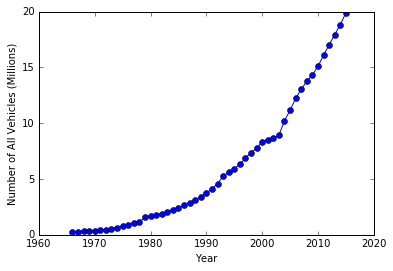

In [151]:
BaseYear = 1966

x = np.matrix(df_arac.Year[0:]).T-BaseYear
y_all = np.matrix(df_arac.All[0:]).T/1000000

plt.plot(x+BaseYear, y_all, 'o-')
plt.xlabel('Year')
plt.ylabel('Number of All Vehicles (Millions)')

## Polynomial Fit

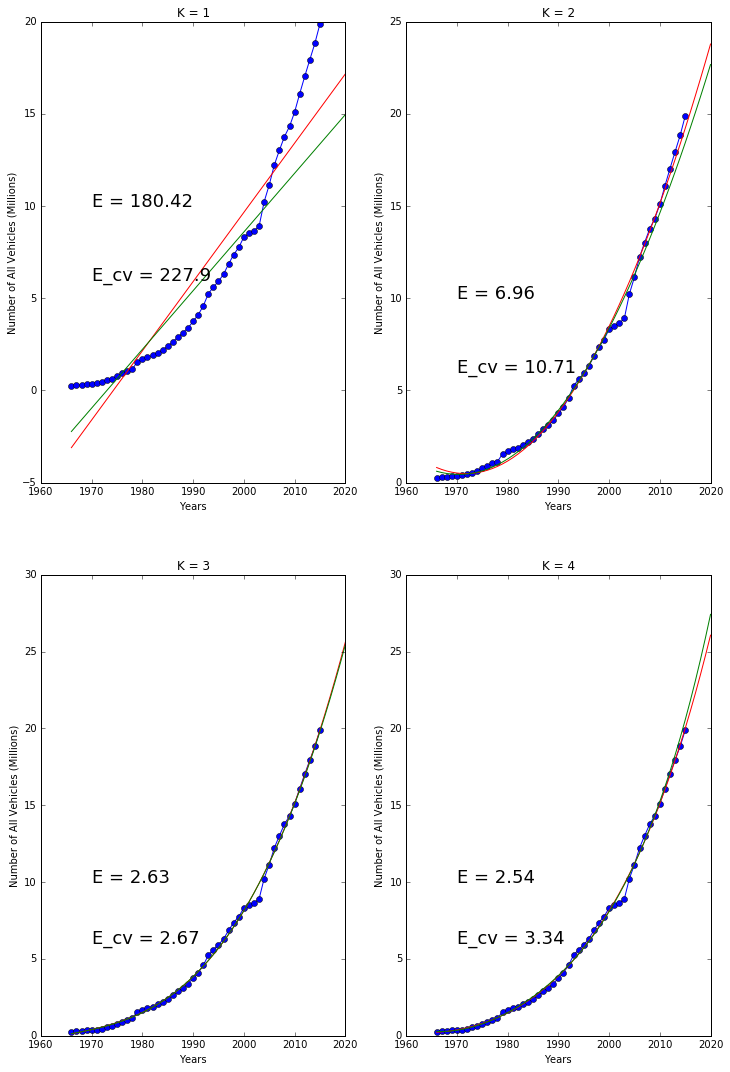

In [152]:

plt.figure(figsize=(12,38))

for degree in range(1,max_degree + 1):
    A_all = np.hstack((np.power(x,i) for i in range(degree+1)))
    xx = np.matrix(np.linspace(0,54,55)).T
    A2_all = np.hstack((np.power(xx,i) for i in range(degree+1)))
    
    w_ls_all,E_all,rank,sigma = np.linalg.lstsq(A_all, y_all)
    
    f_all = A2_all*w_ls_all
    
    plt.subplot(max_degree,2,degree)
    plt.plot(x+BaseYear, y_all, 'o-')
    plt.plot(xx+BaseYear, f_all, 'r')
    plt.xlabel('Years')
    plt.ylabel('Number of All Vehicles (Millions)')
    plt.title('K = ' + str(degree))
    plt.text(1970, 10, r'E = '+str(round(E_all[0,0],2)),fontsize=18)
    
    #Cross-Validation with leaving 5 out
    
    x_cv = x[0:45]
    y_all_cv = y_all[0:45]
    A_all_cv = np.hstack((np.power(x_cv,i) for i in range(degree+1)))
    xx = np.matrix(np.linspace(0,54,55)).T
    A2_all = np.hstack((np.power(xx,i) for i in range(degree+1)))
    
    w_ls_all,E_all,rank,sigma = np.linalg.lstsq(A_all_cv, y_all_cv)
    
    f_all_cv = A2_all*w_ls_all
    plt.plot(xx+BaseYear, f_all_cv, 'g')
    
    E_cv = np.sum(np.power(f_all_cv[0:50]-y_all,2))
    plt.text(1970,6,"E_cv = "+str(round(E_cv,2)),fontsize=18)
    
plt.show()


## AR

<function matplotlib.pyplot.show>

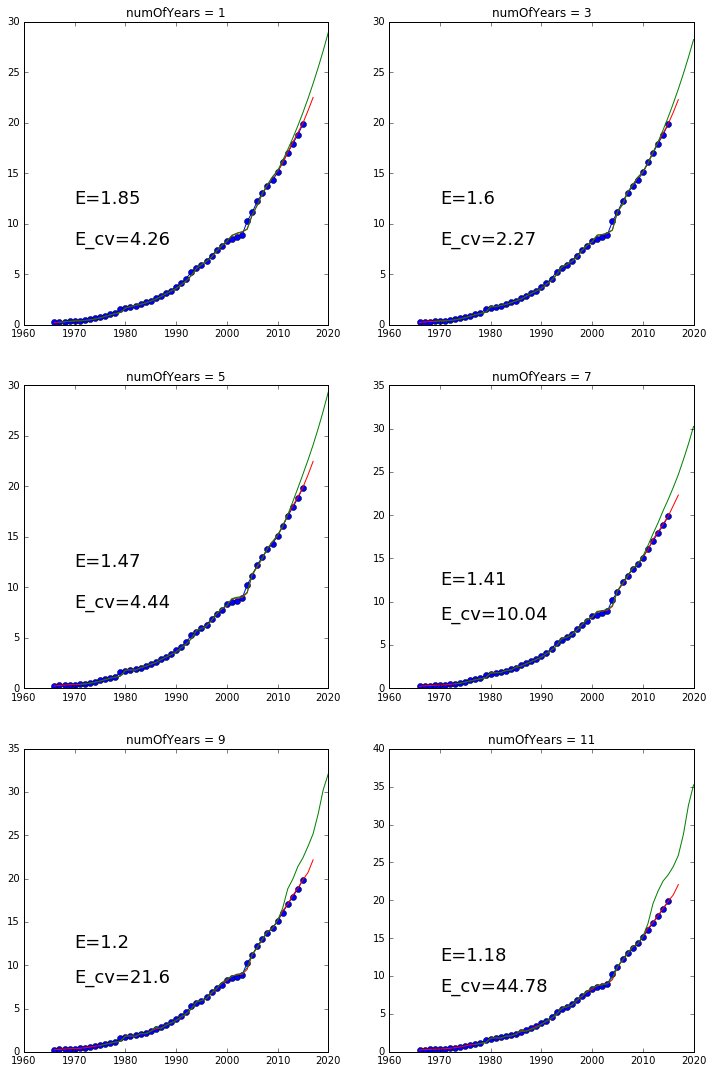

In [153]:

plt.figure(figsize=(12,38))

for numOfYears in range(1,13,2):
    x_ar = x[numOfYears:]
    y_ar = y_all[numOfYears:]
    A_ar = np.matrix(np.linspace(0,1,numOfYears))
    #y_i = np.matrix([0])
    for i in range(numOfYears,len(x)):
        y_i = y_all[(i-numOfYears):i].T
        A_ar = np.vstack((A_ar,y_i))
    
    A_ar = A_ar[1:]
    w_ls_ar,E_ar,rank,sigma = np.linalg.lstsq(A_ar, y_ar)
    f_ar = A_ar*w_ls_ar
    
    #prediction
    x_pred = np.vstack((x,np.matrix([50,51]).T))
    y_pred = np.vstack((y_all[0:numOfYears],f_ar))
    for i in range(len(x),len(x_pred)):
        A_i = y_pred[i-numOfYears:i].T
        f_i = A_i*w_ls_ar
        y_pred = np.vstack((y_pred,f_i))

    plt.subplot(6,2,(numOfYears+1)/2)
    plt.title("numOfYears = "+str(numOfYears))
    plt.plot(x+BaseYear, y_all, 'o-')
    plt.plot(x_pred+BaseYear, y_pred, 'r')
    plt.text(1970,12,"E="+str(round(E_ar[0,0],2)),fontsize=18)
    
    #Cross-Validation with leaving 5 out
    
    x_cv = x[numOfYears:45]
    y_cv = y_all[numOfYears:45]
    A_cv = np.matrix(np.linspace(0,1,numOfYears))
    for i in range(numOfYears,45):
        y_i = y_all[(i-numOfYears):i].T
        A_cv = np.vstack((A_cv,y_i))
    A_cv = A_cv[1:]
    
    w_ls_cv,E_ar,rank,sigma = np.linalg.lstsq(A_cv, y_cv)
    
    f_cv = A_cv*w_ls_cv
    
    x_pred_cv = np.matrix(np.linspace(numOfYears,54,55-numOfYears)).T
    y_pred_cv = np.vstack((y_all[0:numOfYears],f_cv))
    
    for i in range(45,len(x_pred_cv)+numOfYears):
        A_i = y_pred_cv[(i-numOfYears):i].T
        f_i = A_i * w_ls_cv
        y_pred_cv = np.vstack((y_pred_cv,f_i))
    plt.plot(x_pred_cv+BaseYear,y_pred_cv[numOfYears:], 'g')
    E_cv = np.sum(np.power(y_pred_cv[0:50]-y_all,2))
    plt.text(1970,8,"E_cv="+str(round(E_cv,2)),fontsize=18)
    
plt.show

# Cars

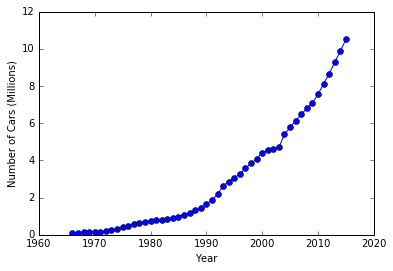

In [154]:
BaseYear = 1966

x = np.matrix(df_arac.Year[0:]).T-BaseYear
y_all = np.matrix(df_arac.Car[0:]).T/1000000

plt.plot(x+BaseYear, y_all, 'o-')
plt.xlabel('Year')
plt.ylabel('Number of Cars (Millions)')

## Polynomial

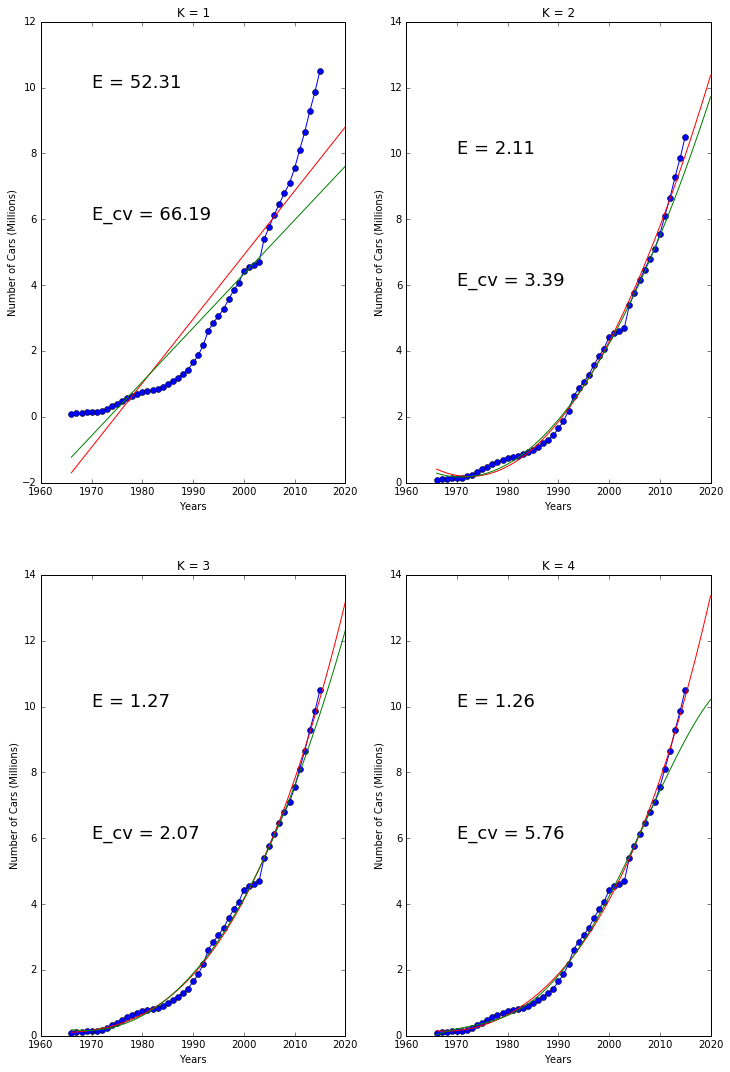

In [155]:
plt.figure(figsize=(12,38))

for degree in range(1,max_degree + 1):
    A_all = np.hstack((np.power(x,i) for i in range(degree+1)))
    xx = np.matrix(np.linspace(0,54,55)).T
    A2_all = np.hstack((np.power(xx,i) for i in range(degree+1)))
    
    w_ls_all,E_all,rank,sigma = np.linalg.lstsq(A_all, y_all)
    
    f_all = A2_all*w_ls_all
    
    plt.subplot(max_degree,2,degree)
    plt.plot(x+BaseYear, y_all, 'o-')
    plt.plot(xx+BaseYear, f_all, 'r')
    plt.xlabel('Years')
    plt.ylabel('Number of Cars (Millions)')
    plt.title('K = ' + str(degree))
    plt.text(1970, 10, r'E = '+str(round(E_all[0,0],2)),fontsize=18)
    
    #Cross-Validation with leaving 5 out
    
    x_cv = x[0:45]
    y_all_cv = y_all[0:45]
    A_all_cv = np.hstack((np.power(x_cv,i) for i in range(degree+1)))
    xx = np.matrix(np.linspace(0,54,55)).T
    A2_all = np.hstack((np.power(xx,i) for i in range(degree+1)))
    
    w_ls_all,E_all,rank,sigma = np.linalg.lstsq(A_all_cv, y_all_cv)
    
    f_all_cv = A2_all*w_ls_all
    plt.plot(xx+BaseYear, f_all_cv, 'g')
    
    E_cv = np.sum(np.power(f_all_cv[0:50]-y_all,2))
    plt.text(1970,6,"E_cv = "+str(round(E_cv,2)),fontsize=18)
    
plt.show()



## AR

<function matplotlib.pyplot.show>

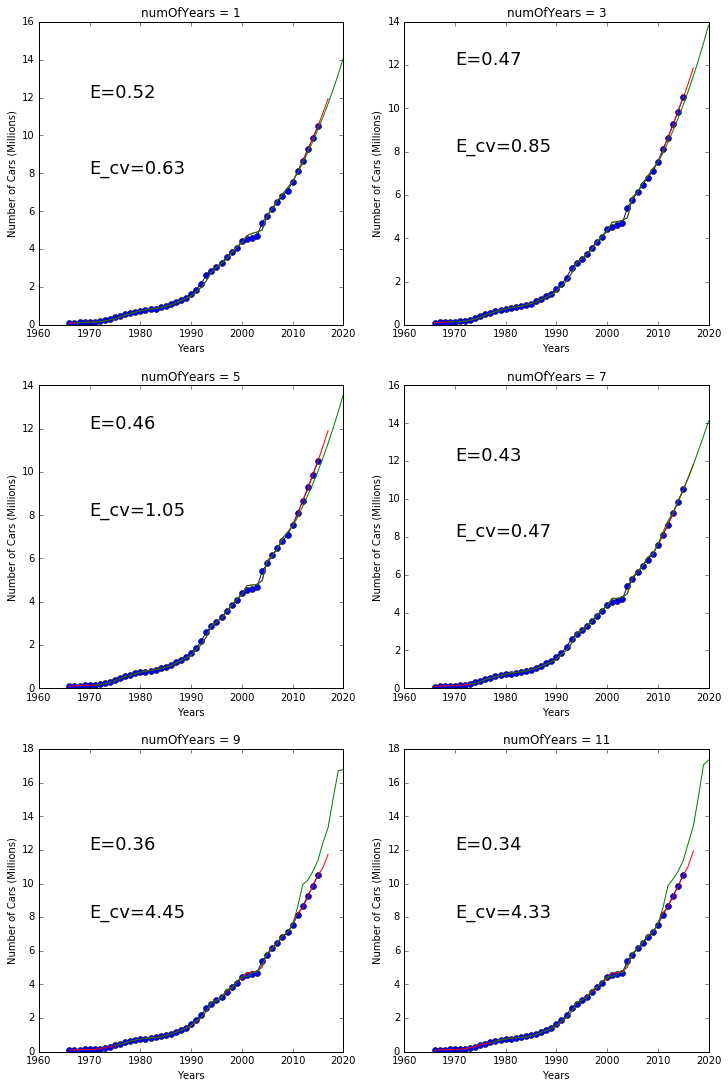

In [156]:
plt.figure(figsize=(12,38))

for numOfYears in range(1,13,2):
    x_ar = x[numOfYears:]
    y_ar = y_all[numOfYears:]
    A_ar = np.matrix(np.linspace(0,1,numOfYears))
    #y_i = np.matrix([0])
    for i in range(numOfYears,len(x)):
        y_i = y_all[(i-numOfYears):i].T
        A_ar = np.vstack((A_ar,y_i))
    
    A_ar = A_ar[1:]
    w_ls_ar,E_ar,rank,sigma = np.linalg.lstsq(A_ar, y_ar)
    f_ar = A_ar*w_ls_ar
    
    #prediction
    x_pred = np.vstack((x,np.matrix([50,51]).T))
    y_pred = np.vstack((y_all[0:numOfYears],f_ar))
    for i in range(len(x),len(x_pred)):
        A_i = y_pred[i-numOfYears:i].T
        f_i = A_i*w_ls_ar
        y_pred = np.vstack((y_pred,f_i))

    plt.subplot(6,2,(numOfYears+1)/2)
    plt.title("numOfYears = "+str(numOfYears))
    plt.plot(x+BaseYear, y_all, 'o-')
    plt.plot(x_pred+BaseYear, y_pred, 'r')
    plt.xlabel('Years')
    plt.ylabel('Number of Cars (Millions)')
    plt.text(1970,12,"E="+str(round(E_ar[0,0],2)),fontsize=18)
    
    #Cross-Validation with leaving 5 out
    
    x_cv = x[numOfYears:45]
    y_cv = y_all[numOfYears:45]
    A_cv = np.matrix(np.linspace(0,1,numOfYears))
    for i in range(numOfYears,45):
        y_i = y_all[(i-numOfYears):i].T
        A_cv = np.vstack((A_cv,y_i))
    A_cv = A_cv[1:]
    
    w_ls_cv,E_ar,rank,sigma = np.linalg.lstsq(A_cv, y_cv)
    
    f_cv = A_cv*w_ls_cv
    
    x_pred_cv = np.matrix(np.linspace(numOfYears,54,55-numOfYears)).T
    y_pred_cv = np.vstack((y_all[0:numOfYears],f_cv))
    
    for i in range(45,len(x_pred_cv)+numOfYears):
        A_i = y_pred_cv[(i-numOfYears):i].T
        f_i = A_i * w_ls_cv
        y_pred_cv = np.vstack((y_pred_cv,f_i))
    plt.plot(x_pred_cv+BaseYear,y_pred_cv[numOfYears:], 'g')
    E_cv = np.sum(np.power(y_pred_cv[0:50]-y_all,2))
    plt.text(1970,8,"E_cv="+str(round(E_cv,2)),fontsize=18)
    
plt.show

# Minibus

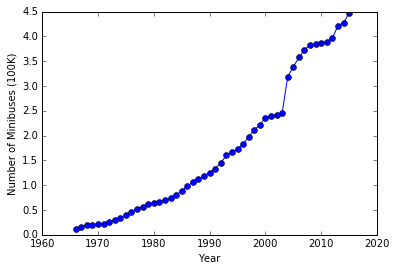

In [157]:
BaseYear = 1966

x = np.matrix(df_arac.Year[0:]).T-BaseYear
y_all = np.matrix(df_arac.Minibus[0:]).T/100000

plt.plot(x+BaseYear, y_all, 'o-')
plt.xlabel('Year')
plt.ylabel('Number of Minibuses (100K)')

## Polynomial

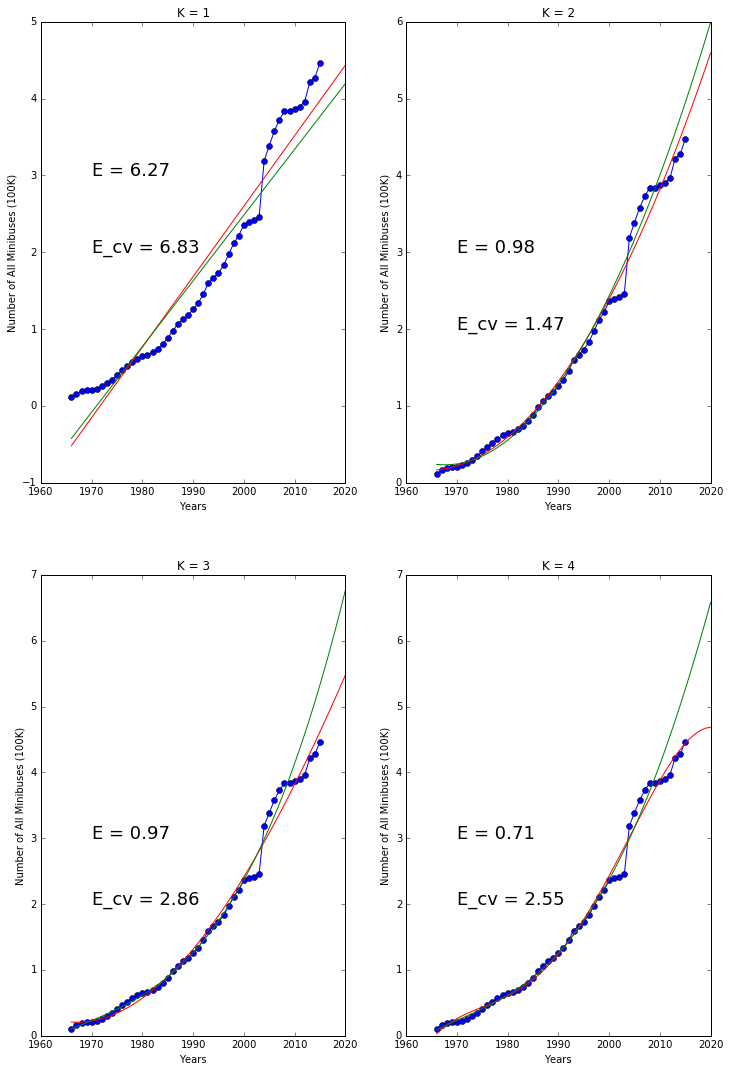

In [158]:

plt.figure(figsize=(12,38))

for degree in range(1,max_degree + 1):
    A_all = np.hstack((np.power(x,i) for i in range(degree+1)))
    xx = np.matrix(np.linspace(0,54,55)).T
    A2_all = np.hstack((np.power(xx,i) for i in range(degree+1)))
    
    w_ls_all,E_all,rank,sigma = np.linalg.lstsq(A_all, y_all)
    
    f_all = A2_all*w_ls_all
    
    plt.subplot(max_degree,2,degree)
    plt.plot(x+BaseYear, y_all, 'o-')
    plt.plot(xx+BaseYear, f_all, 'r')
    plt.xlabel('Years')
    plt.ylabel('Number of All Minibuses (100K)')
    plt.title('K = ' + str(degree))
    plt.text(1970, 3, r'E = '+str(round(E_all[0,0],2)),fontsize=18)
    
    #Cross-Validation with leaving 5 out
    
    x_cv = x[0:45]
    y_all_cv = y_all[0:45]
    A_all_cv = np.hstack((np.power(x_cv,i) for i in range(degree+1)))
    xx = np.matrix(np.linspace(0,54,55)).T
    A2_all = np.hstack((np.power(xx,i) for i in range(degree+1)))
    
    w_ls_all,E_all,rank,sigma = np.linalg.lstsq(A_all_cv, y_all_cv)
    
    f_all_cv = A2_all*w_ls_all
    plt.plot(xx+BaseYear, f_all_cv, 'g')
    
    E_cv = np.sum(np.power(f_all_cv[0:50]-y_all,2))
    plt.text(1970,2,"E_cv = "+str(round(E_cv,2)),fontsize=18)
    
plt.show()

## AR

<function matplotlib.pyplot.show>

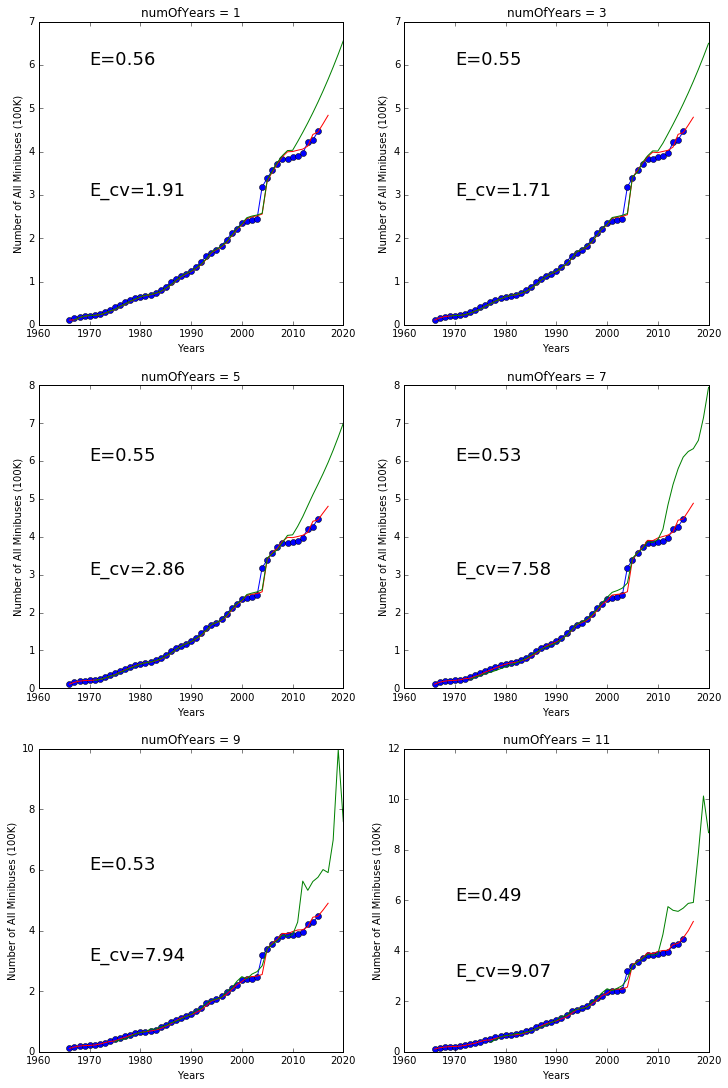

In [159]:

plt.figure(figsize=(12,38))

for numOfYears in range(1,13,2):
    x_ar = x[numOfYears:]
    y_ar = y_all[numOfYears:]
    A_ar = np.matrix(np.linspace(0,1,numOfYears))
    #y_i = np.matrix([0])
    for i in range(numOfYears,len(x)):
        y_i = y_all[(i-numOfYears):i].T
        A_ar = np.vstack((A_ar,y_i))
    
    A_ar = A_ar[1:]
    w_ls_ar,E_ar,rank,sigma = np.linalg.lstsq(A_ar, y_ar)
    f_ar = A_ar*w_ls_ar
    
    #prediction
    x_pred = np.vstack((x,np.matrix([50,51]).T))
    y_pred = np.vstack((y_all[0:numOfYears],f_ar))
    for i in range(len(x),len(x_pred)):
        A_i = y_pred[i-numOfYears:i].T
        f_i = A_i*w_ls_ar
        y_pred = np.vstack((y_pred,f_i))

    plt.subplot(6,2,(numOfYears+1)/2)
    plt.title("numOfYears = "+str(numOfYears))
    plt.plot(x+BaseYear, y_all, 'o-')
    plt.plot(x_pred+BaseYear, y_pred, 'r')
    plt.xlabel('Years')
    plt.ylabel('Number of All Minibuses (100K)')
    plt.text(1970,6,"E="+str(round(E_ar[0,0],2)),fontsize=18)
    
    #Cross-Validation with leaving 5 out
    
    x_cv = x[numOfYears:45]
    y_cv = y_all[numOfYears:45]
    A_cv = np.matrix(np.linspace(0,1,numOfYears))
    for i in range(numOfYears,45):
        y_i = y_all[(i-numOfYears):i].T
        A_cv = np.vstack((A_cv,y_i))
    A_cv = A_cv[1:]
    
    w_ls_cv,E_ar,rank,sigma = np.linalg.lstsq(A_cv, y_cv)
    
    f_cv = A_cv*w_ls_cv
    
    x_pred_cv = np.matrix(np.linspace(numOfYears,54,55-numOfYears)).T
    y_pred_cv = np.vstack((y_all[0:numOfYears],f_cv))
    
    for i in range(45,len(x_pred_cv)+numOfYears):
        A_i = y_pred_cv[(i-numOfYears):i].T
        f_i = A_i * w_ls_cv
        y_pred_cv = np.vstack((y_pred_cv,f_i))
    plt.plot(x_pred_cv+BaseYear,y_pred_cv[numOfYears:], 'g')
    E_cv = np.sum(np.power(y_pred_cv[0:50]-y_all,2))
    plt.text(1970,3,"E_cv="+str(round(E_cv,2)),fontsize=18)
    
plt.show

# Bus

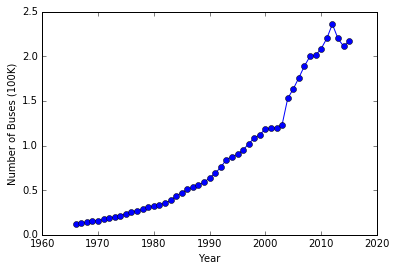

In [160]:
BaseYear = 1966

x = np.matrix(df_arac.Year[0:]).T-BaseYear
y_all = np.matrix(df_arac.Bus[0:]).T/100000

plt.plot(x+BaseYear, y_all, 'o-')
plt.xlabel('Year')
plt.ylabel('Number of Buses (100K)')

## Polynomial

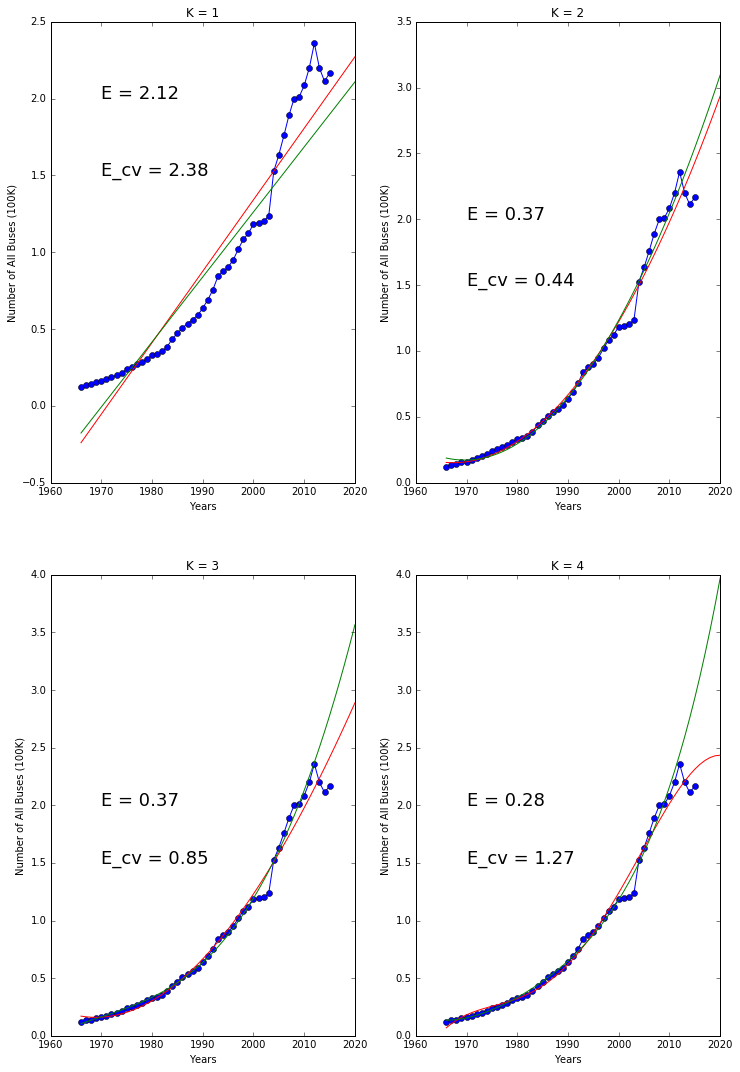

In [161]:

plt.figure(figsize=(12,38))

for degree in range(1,max_degree + 1):
    A_all = np.hstack((np.power(x,i) for i in range(degree+1)))
    xx = np.matrix(np.linspace(0,54,55)).T
    A2_all = np.hstack((np.power(xx,i) for i in range(degree+1)))
    
    w_ls_all,E_all,rank,sigma = np.linalg.lstsq(A_all, y_all)
    
    f_all = A2_all*w_ls_all
    
    plt.subplot(max_degree,2,degree)
    plt.plot(x+BaseYear, y_all, 'o-')
    plt.plot(xx+BaseYear, f_all, 'r')
    plt.xlabel('Years')
    plt.ylabel('Number of All Buses (100K)')
    plt.title('K = ' + str(degree))
    plt.text(1970, 2, r'E = '+str(round(E_all[0,0],2)),fontsize=18)
    
    #Cross-Validation with leaving 5 out
    
    x_cv = x[0:45]
    y_all_cv = y_all[0:45]
    A_all_cv = np.hstack((np.power(x_cv,i) for i in range(degree+1)))
    xx = np.matrix(np.linspace(0,54,55)).T
    A2_all = np.hstack((np.power(xx,i) for i in range(degree+1)))
    
    w_ls_all,E_all,rank,sigma = np.linalg.lstsq(A_all_cv, y_all_cv)
    
    f_all_cv = A2_all*w_ls_all
    plt.plot(xx+BaseYear, f_all_cv, 'g')
    
    E_cv = np.sum(np.power(f_all_cv[0:50]-y_all,2))
    plt.text(1970,1.5,"E_cv = "+str(round(E_cv,2)),fontsize=18)
    
plt.show()


## AR

<function matplotlib.pyplot.show>

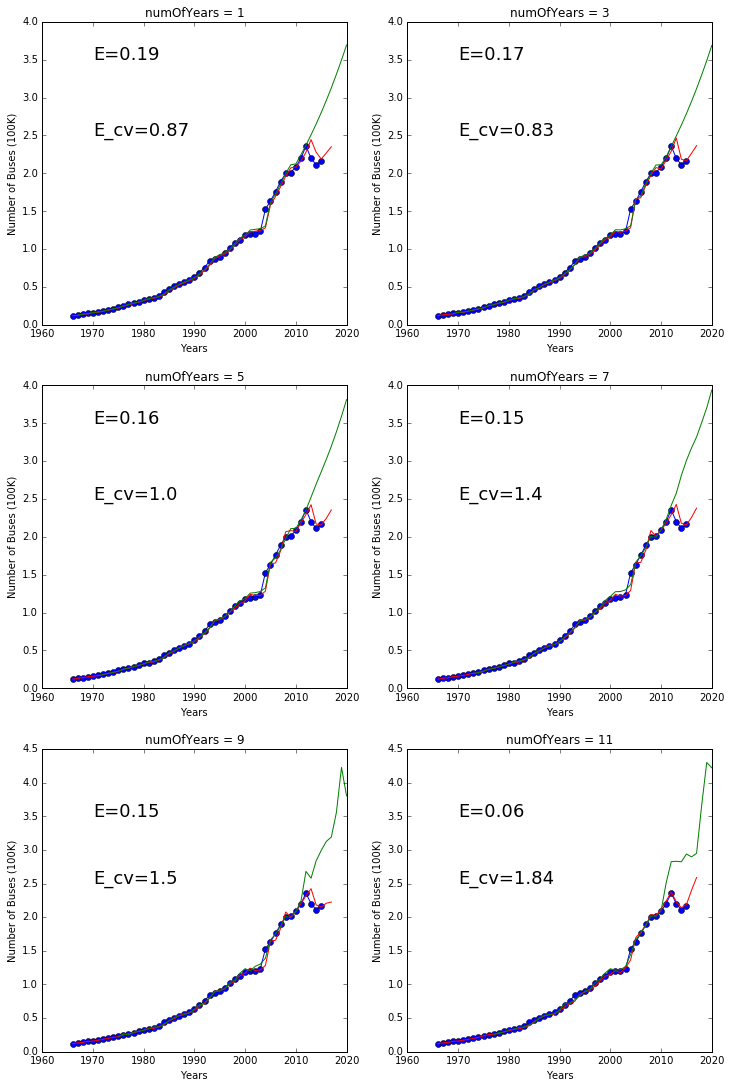

In [162]:

plt.figure(figsize=(12,38))

for numOfYears in range(1,13,2):
    x_ar = x[numOfYears:]
    y_ar = y_all[numOfYears:]
    A_ar = np.matrix(np.linspace(0,1,numOfYears))
    #y_i = np.matrix([0])
    for i in range(numOfYears,len(x)):
        y_i = y_all[(i-numOfYears):i].T
        A_ar = np.vstack((A_ar,y_i))
    
    A_ar = A_ar[1:]
    w_ls_ar,E_ar,rank,sigma = np.linalg.lstsq(A_ar, y_ar)
    f_ar = A_ar*w_ls_ar
    
    #prediction
    x_pred = np.vstack((x,np.matrix([50,51]).T))
    y_pred = np.vstack((y_all[0:numOfYears],f_ar))
    for i in range(len(x),len(x_pred)):
        A_i = y_pred[i-numOfYears:i].T
        f_i = A_i*w_ls_ar
        y_pred = np.vstack((y_pred,f_i))

    plt.subplot(6,2,(numOfYears+1)/2)
    plt.title("numOfYears = "+str(numOfYears))
    plt.plot(x+BaseYear, y_all, 'o-')
    plt.plot(x_pred+BaseYear, y_pred, 'r')
    plt.xlabel('Years')
    plt.ylabel('Number of Buses (100K)')
    plt.text(1970,3.5,"E="+str(round(E_ar[0,0],2)),fontsize=18)
    
    #Cross-Validation with leaving 5 out
    
    x_cv = x[numOfYears:45]
    y_cv = y_all[numOfYears:45]
    A_cv = np.matrix(np.linspace(0,1,numOfYears))
    for i in range(numOfYears,45):
        y_i = y_all[(i-numOfYears):i].T
        A_cv = np.vstack((A_cv,y_i))
    A_cv = A_cv[1:]
    
    w_ls_cv,E_ar,rank,sigma = np.linalg.lstsq(A_cv, y_cv)
    
    f_cv = A_cv*w_ls_cv
    
    x_pred_cv = np.matrix(np.linspace(numOfYears,54,55-numOfYears)).T
    y_pred_cv = np.vstack((y_all[0:numOfYears],f_cv))
    
    for i in range(45,len(x_pred_cv)+numOfYears):
        A_i = y_pred_cv[(i-numOfYears):i].T
        f_i = A_i * w_ls_cv
        y_pred_cv = np.vstack((y_pred_cv,f_i))
    plt.plot(x_pred_cv+BaseYear,y_pred_cv[numOfYears:], 'g')
    E_cv = np.sum(np.power(y_pred_cv[0:50]-y_all,2))
    plt.text(1970,2.5,"E_cv="+str(round(E_cv,2)),fontsize=18)
    
plt.show

# Small Truck

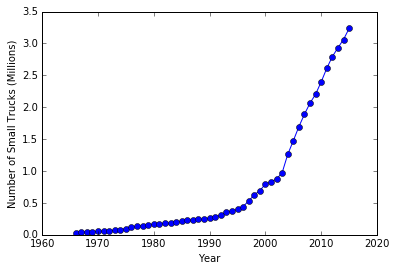

In [163]:
BaseYear = 1966

x = np.matrix(df_arac.Year[0:]).T-BaseYear
y_all = np.matrix(df_arac.SmallTruck[0:]).T/1000000

plt.plot(x+BaseYear, y_all, 'o-')
plt.xlabel('Year')
plt.ylabel('Number of Small Trucks (Millions)')

## Polynomial

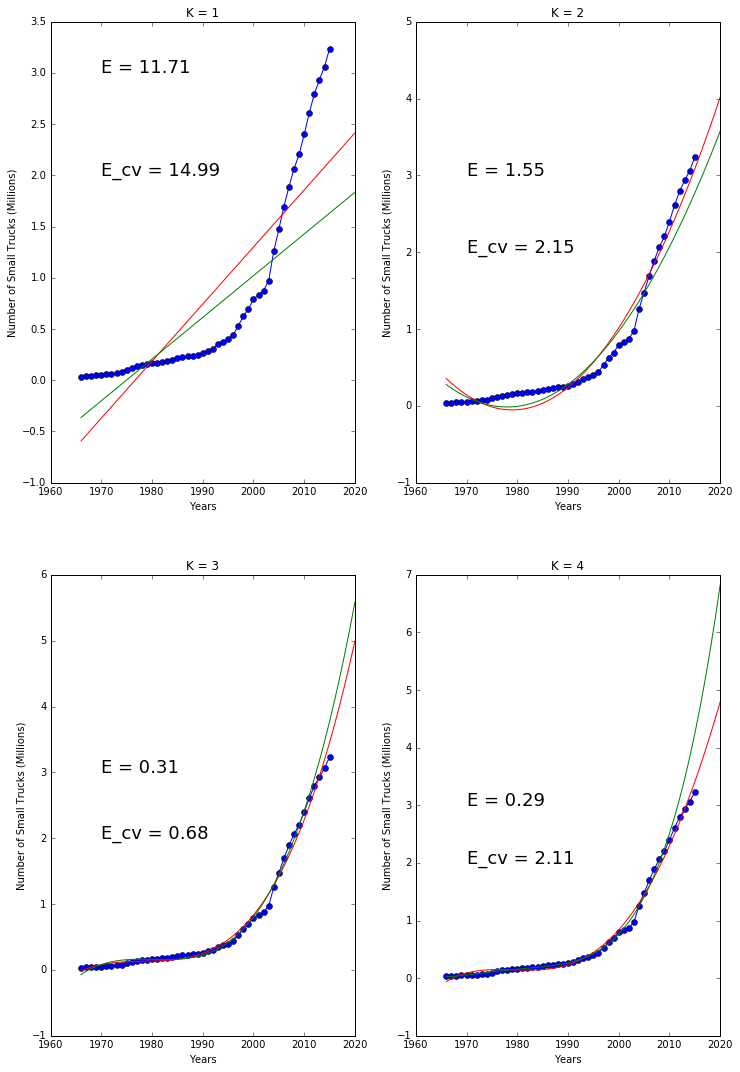

In [164]:

plt.figure(figsize=(12,38))

for degree in range(1,max_degree + 1):
    A_all = np.hstack((np.power(x,i) for i in range(degree+1)))
    xx = np.matrix(np.linspace(0,54,55)).T
    A2_all = np.hstack((np.power(xx,i) for i in range(degree+1)))
    
    w_ls_all,E_all,rank,sigma = np.linalg.lstsq(A_all, y_all)
    
    f_all = A2_all*w_ls_all
    
    plt.subplot(max_degree,2,degree)
    plt.plot(x+BaseYear, y_all, 'o-')
    plt.plot(xx+BaseYear, f_all, 'r')
    plt.xlabel('Years')
    plt.ylabel('Number of Small Trucks (Millions)')
    plt.title('K = ' + str(degree))
    plt.text(1970, 3, r'E = '+str(round(E_all[0,0],2)),fontsize=18)
    
    #Cross-Validation with leaving 5 out
    
    x_cv = x[0:45]
    y_all_cv = y_all[0:45]
    A_all_cv = np.hstack((np.power(x_cv,i) for i in range(degree+1)))
    xx = np.matrix(np.linspace(0,54,55)).T
    A2_all = np.hstack((np.power(xx,i) for i in range(degree+1)))
    
    w_ls_all,E_all,rank,sigma = np.linalg.lstsq(A_all_cv, y_all_cv)
    
    f_all_cv = A2_all*w_ls_all
    plt.plot(xx+BaseYear, f_all_cv, 'g')
    
    E_cv = np.sum(np.power(f_all_cv[0:50]-y_all,2))
    plt.text(1970,2,"E_cv = "+str(round(E_cv,2)),fontsize=18)
    
plt.show()

## AR

<function matplotlib.pyplot.show>

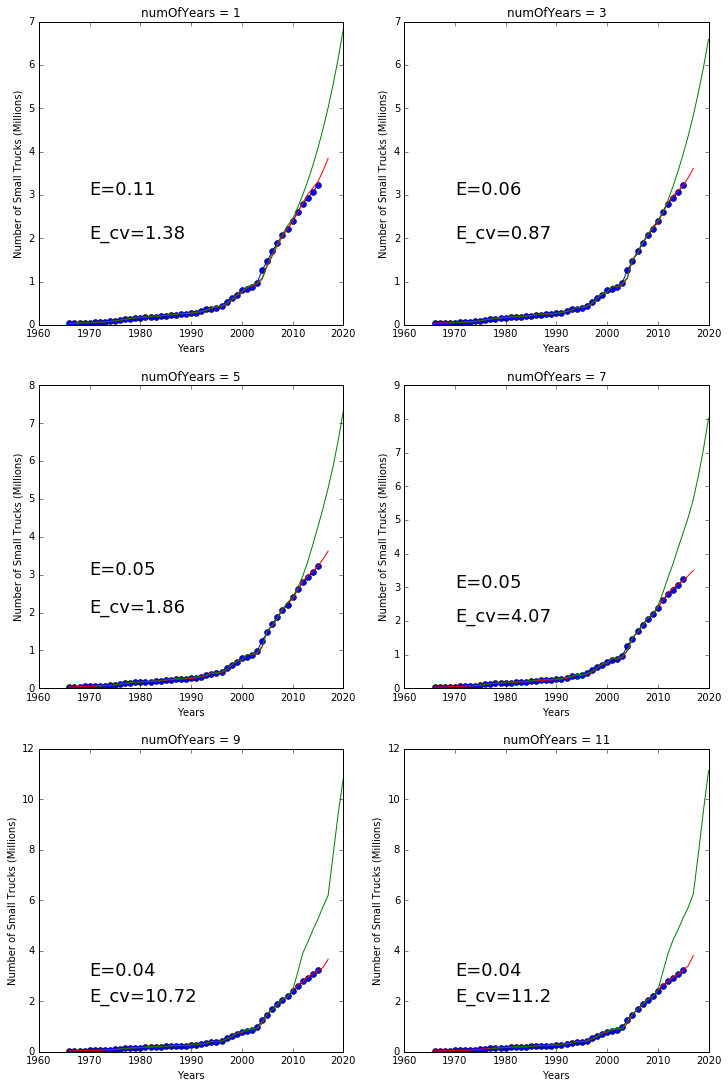

In [165]:

plt.figure(figsize=(12,38))

for numOfYears in range(1,13,2):
    x_ar = x[numOfYears:]
    y_ar = y_all[numOfYears:]
    A_ar = np.matrix(np.linspace(0,1,numOfYears))
    #y_i = np.matrix([0])
    for i in range(numOfYears,len(x)):
        y_i = y_all[(i-numOfYears):i].T
        A_ar = np.vstack((A_ar,y_i))
    
    A_ar = A_ar[1:]
    w_ls_ar,E_ar,rank,sigma = np.linalg.lstsq(A_ar, y_ar)
    f_ar = A_ar*w_ls_ar
    
    #prediction
    x_pred = np.vstack((x,np.matrix([50,51]).T))
    y_pred = np.vstack((y_all[0:numOfYears],f_ar))
    for i in range(len(x),len(x_pred)):
        A_i = y_pred[i-numOfYears:i].T
        f_i = A_i*w_ls_ar
        y_pred = np.vstack((y_pred,f_i))

    plt.subplot(6,2,(numOfYears+1)/2)
    plt.title("numOfYears = "+str(numOfYears))
    plt.plot(x+BaseYear, y_all, 'o-')
    plt.plot(x_pred+BaseYear, y_pred, 'r')
    plt.xlabel('Years')
    plt.ylabel('Number of Small Trucks (Millions)')
    plt.text(1970,3,"E="+str(round(E_ar[0,0],2)),fontsize=18)
    
    #Cross-Validation with leaving 5 out
    
    x_cv = x[numOfYears:45]
    y_cv = y_all[numOfYears:45]
    A_cv = np.matrix(np.linspace(0,1,numOfYears))
    for i in range(numOfYears,45):
        y_i = y_all[(i-numOfYears):i].T
        A_cv = np.vstack((A_cv,y_i))
    A_cv = A_cv[1:]
    
    w_ls_cv,E_ar,rank,sigma = np.linalg.lstsq(A_cv, y_cv)
    
    f_cv = A_cv*w_ls_cv
    
    x_pred_cv = np.matrix(np.linspace(numOfYears,54,55-numOfYears)).T
    y_pred_cv = np.vstack((y_all[0:numOfYears],f_cv))
    
    for i in range(45,len(x_pred_cv)+numOfYears):
        A_i = y_pred_cv[(i-numOfYears):i].T
        f_i = A_i * w_ls_cv
        y_pred_cv = np.vstack((y_pred_cv,f_i))
    plt.plot(x_pred_cv+BaseYear,y_pred_cv[numOfYears:], 'g')
    E_cv = np.sum(np.power(y_pred_cv[0:50]-y_all,2))
    plt.text(1970,2,"E_cv="+str(round(E_cv,2)),fontsize=18)
    
plt.show

# Truck

*unnatural jump in ~2004 needs to be normalized for a healthy fit

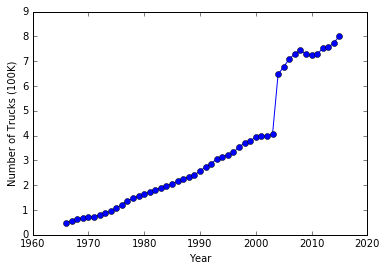

In [166]:
BaseYear = 1966

x = np.matrix(df_arac.Year[0:]).T-BaseYear
y_all = np.matrix(df_arac.Truck[0:]).T/100000

plt.plot(x+BaseYear, y_all, 'o-')
plt.xlabel('Year')
plt.ylabel('Number of Trucks (100K)')

## Polynomial

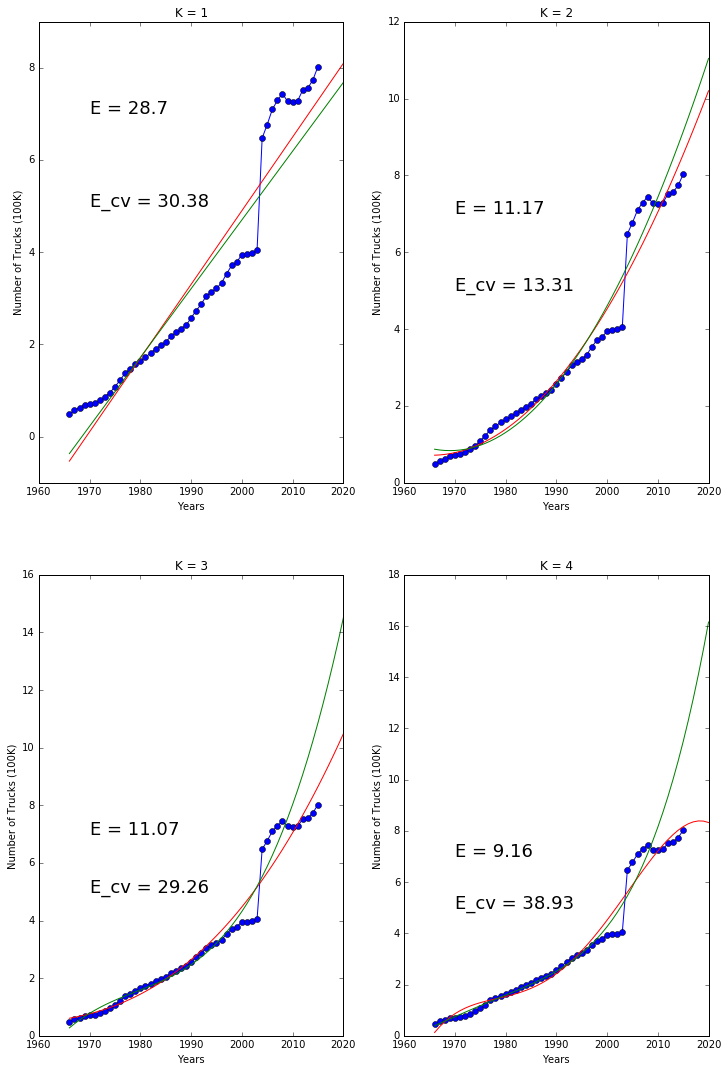

In [167]:

plt.figure(figsize=(12,38))

for degree in range(1,max_degree + 1):
    A_all = np.hstack((np.power(x,i) for i in range(degree+1)))
    xx = np.matrix(np.linspace(0,54,55)).T
    A2_all = np.hstack((np.power(xx,i) for i in range(degree+1)))
    
    w_ls_all,E_all,rank,sigma = np.linalg.lstsq(A_all, y_all)
    
    f_all = A2_all*w_ls_all
    
    plt.subplot(max_degree,2,degree)
    plt.plot(x+BaseYear, y_all, 'o-')
    plt.plot(xx+BaseYear, f_all, 'r')
    plt.xlabel('Years')
    plt.ylabel('Number of Trucks (100K)')
    plt.title('K = ' + str(degree))
    plt.text(1970, 7, r'E = '+str(round(E_all[0,0],2)),fontsize=18)
    
    #Cross-Validation with leaving 5 out
    
    x_cv = x[0:45]
    y_all_cv = y_all[0:45]
    A_all_cv = np.hstack((np.power(x_cv,i) for i in range(degree+1)))
    xx = np.matrix(np.linspace(0,54,55)).T
    A2_all = np.hstack((np.power(xx,i) for i in range(degree+1)))
    
    w_ls_all,E_all,rank,sigma = np.linalg.lstsq(A_all_cv, y_all_cv)
    
    f_all_cv = A2_all*w_ls_all
    plt.plot(xx+BaseYear, f_all_cv, 'g')
    
    E_cv = np.sum(np.power(f_all_cv[0:50]-y_all,2))
    plt.text(1970,5,"E_cv = "+str(round(E_cv,2)),fontsize=18)
    
plt.show()



## AR
* AR model is very bad due to the jump

# Motorcycle

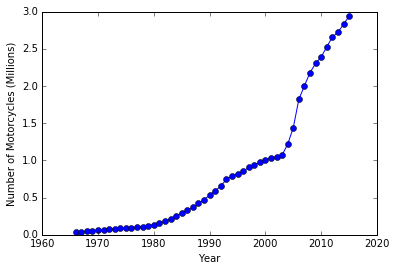

In [168]:
BaseYear = 1966

x = np.matrix(df_arac.Year[0:]).T-BaseYear
y_all = np.matrix(df_arac.Motorcycle[0:]).T/1000000

plt.plot(x+BaseYear, y_all, 'o-')
plt.xlabel('Year')
plt.ylabel('Number of Motorcycles (Millions)')

## Polynomial

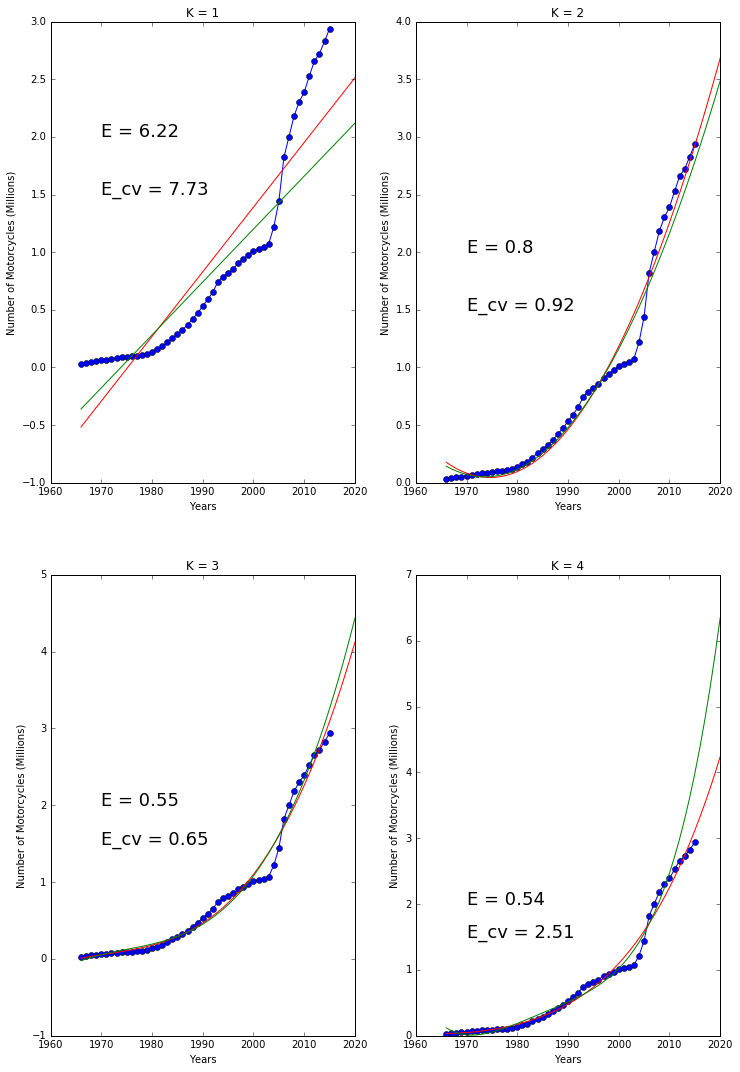

In [169]:

plt.figure(figsize=(12,38))

for degree in range(1,max_degree + 1):
    A_all = np.hstack((np.power(x,i) for i in range(degree+1)))
    xx = np.matrix(np.linspace(0,54,55)).T
    A2_all = np.hstack((np.power(xx,i) for i in range(degree+1)))
    
    w_ls_all,E_all,rank,sigma = np.linalg.lstsq(A_all, y_all)
    
    f_all = A2_all*w_ls_all
    
    plt.subplot(max_degree,2,degree)
    plt.plot(x+BaseYear, y_all, 'o-')
    plt.plot(xx+BaseYear, f_all, 'r')
    plt.xlabel('Years')
    plt.ylabel('Number of Motorcycles (Millions)')
    plt.title('K = ' + str(degree))
    plt.text(1970, 2, r'E = '+str(round(E_all[0,0],2)),fontsize=18)
    
    #Cross-Validation with leaving 5 out
    
    x_cv = x[0:45]
    y_all_cv = y_all[0:45]
    A_all_cv = np.hstack((np.power(x_cv,i) for i in range(degree+1)))
    xx = np.matrix(np.linspace(0,54,55)).T
    A2_all = np.hstack((np.power(xx,i) for i in range(degree+1)))
    
    w_ls_all,E_all,rank,sigma = np.linalg.lstsq(A_all_cv, y_all_cv)
    
    f_all_cv = A2_all*w_ls_all
    plt.plot(xx+BaseYear, f_all_cv, 'g')
    
    E_cv = np.sum(np.power(f_all_cv[0:50]-y_all,2))
    plt.text(1970,1.5,"E_cv = "+str(round(E_cv,2)),fontsize=18)
    
plt.show()



## AR

<function matplotlib.pyplot.show>

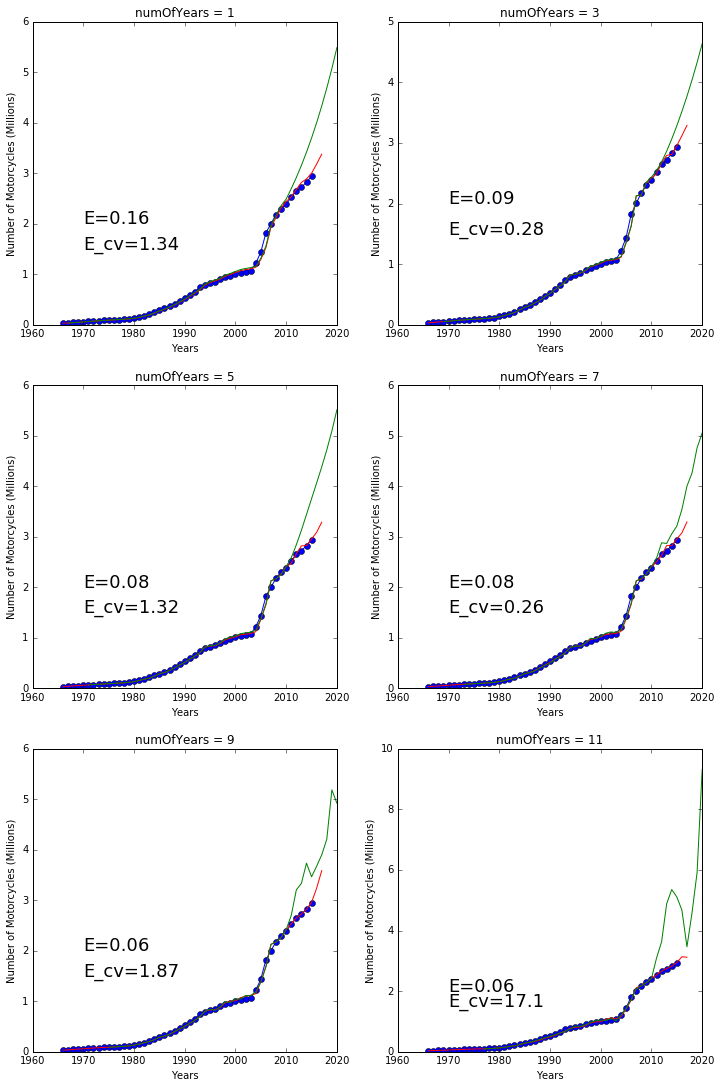

In [170]:

plt.figure(figsize=(12,38))

for numOfYears in range(1,13,2):
    x_ar = x[numOfYears:]
    y_ar = y_all[numOfYears:]
    A_ar = np.matrix(np.linspace(0,1,numOfYears))
    #y_i = np.matrix([0])
    for i in range(numOfYears,len(x)):
        y_i = y_all[(i-numOfYears):i].T
        A_ar = np.vstack((A_ar,y_i))
    
    A_ar = A_ar[1:]
    w_ls_ar,E_ar,rank,sigma = np.linalg.lstsq(A_ar, y_ar)
    f_ar = A_ar*w_ls_ar
    
    #prediction
    x_pred = np.vstack((x,np.matrix([50,51]).T))
    y_pred = np.vstack((y_all[0:numOfYears],f_ar))
    for i in range(len(x),len(x_pred)):
        A_i = y_pred[i-numOfYears:i].T
        f_i = A_i*w_ls_ar
        y_pred = np.vstack((y_pred,f_i))

    plt.subplot(6,2,(numOfYears+1)/2)
    plt.title("numOfYears = "+str(numOfYears))
    plt.plot(x+BaseYear, y_all, 'o-')
    plt.plot(x_pred+BaseYear, y_pred, 'r')
    plt.xlabel('Years')
    plt.ylabel('Number of Motorcycles (Millions)')
    plt.text(1970,2,"E="+str(round(E_ar[0,0],2)),fontsize=18)
    
    #Cross-Validation with leaving 5 out
    
    x_cv = x[numOfYears:45]
    y_cv = y_all[numOfYears:45]
    A_cv = np.matrix(np.linspace(0,1,numOfYears))
    for i in range(numOfYears,45):
        y_i = y_all[(i-numOfYears):i].T
        A_cv = np.vstack((A_cv,y_i))
    A_cv = A_cv[1:]
    
    w_ls_cv,E_ar,rank,sigma = np.linalg.lstsq(A_cv, y_cv)
    
    f_cv = A_cv*w_ls_cv
    
    x_pred_cv = np.matrix(np.linspace(numOfYears,54,55-numOfYears)).T
    y_pred_cv = np.vstack((y_all[0:numOfYears],f_cv))
    
    for i in range(45,len(x_pred_cv)+numOfYears):
        A_i = y_pred_cv[(i-numOfYears):i].T
        f_i = A_i * w_ls_cv
        y_pred_cv = np.vstack((y_pred_cv,f_i))
    plt.plot(x_pred_cv+BaseYear,y_pred_cv[numOfYears:], 'g')
    E_cv = np.sum(np.power(y_pred_cv[0:50]-y_all,2))
    plt.text(1970,1.5,"E_cv="+str(round(E_cv,2)),fontsize=18)
    
plt.show

# Conclusion

  For polynomial fit K=3 seems to have a better performance for most cases. For AR fit using previous 5 years as features seems to be the best case. AR model yields in lower errors in the traning sets compared to polynomial fit, however ar model performs poorly in cross validation since it is very sensitive to the sudden increases in the data. I would prefer using 3rd degree polynomial fit for prediction
